# Medidas de dispersion en Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_cars=pd.read_csv('dataset/cars.csv')
df_cars.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151


In [4]:
# Desviación estándar
# Tomando el precio de autos
df_cars['price_usd'].std()

6428.1520182029035

In [6]:
#Rango = Max - Min
rango = df_cars['price_usd'].max() - df_cars['price_usd'].min()
rango

49999.0

In [8]:
# Mediana es uno de los cuartiles
# Q2
mediana = df_cars['price_usd'].median()
mediana

4800.0

In [10]:
#Calculando cuartiles
#Los cuartiles dividen los datos en 4
Q1= df_cars['price_usd'].quantile(q=0.25)
Q3= df_cars['price_usd'].quantile(q=0.75)
#Los cuartiles también tienen los máximos y mínimos
valor_min= df_cars['price_usd'].quantile(q=0.0)
valor_max= df_cars['price_usd'].quantile(q=1)

print(f'Q1={Q1}\nQ3={Q3}\nmin={valor_min}\nmax={valor_max}')

Q1=2100.0
Q3=8990.0
min=1.0
max=50000.0


El Cuantil es concepto general de como dividir los datos de manera homogénea, es decir cuando se divide en 100 el conjunto de datos, tenemos percentiles, cuando dividimos en 4 tenemos cuartiles. Entonces esta función de Python es en general el concepto de **Cuantil** 

$$IQR=Q3-Q1$$

In [11]:
iqr=Q3-Q1
print(f'IQR = {iqr}')

IQR = 6890.0


## Limites para detección de outliers (datos simétricamente distribuidos)
- $Q1-1.5\;IQR\quad Mínimo$ 
- $Q1+1.5\;IQR\quad Máximo$

In [14]:
min_limit=Q1-(1.5*iqr)
max_limit=Q1+(1.5*iqr)
print(f'Limite mínimo = {min_limit}\nLimite máximo = {max_limit}')

Limite mínimo = -8235.0
Limite máximo = 12435.0


Pero lo anterior no tiene sentido, entonces como recordemos es debido a que no es una distribución simétrica. Hay valores negativos porque estamos intentando ajustar la definición de distribución simétrica a una distribución no simétrica.

Lo que haremos sera dibujar el **box plot**

<Axes: xlabel='price_usd', ylabel='Count'>

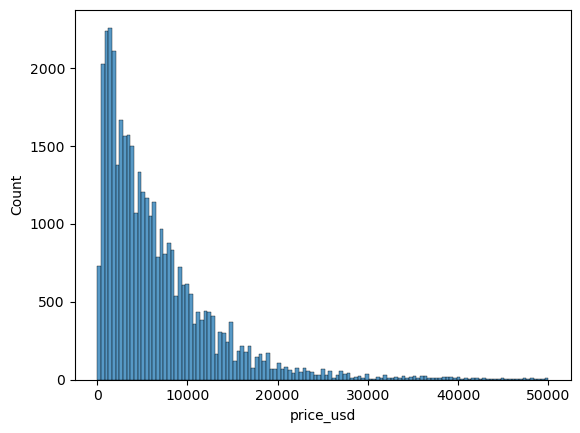

In [16]:

sns.histplot(df_cars['price_usd'])


<Axes: xlabel='price_usd'>

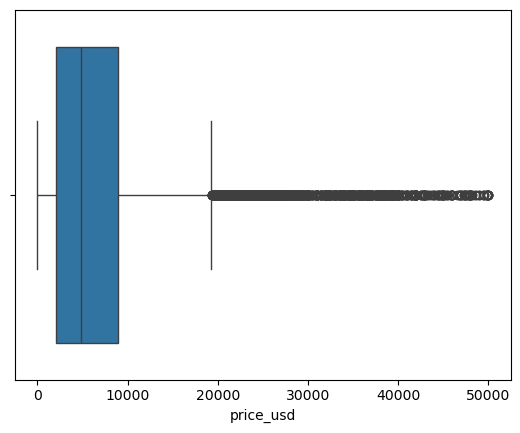

In [18]:
sns.boxplot(x=df_cars['price_usd'])

El diagrama anterior nos permite detectar la concentración de los datos, el IQR y ademas los datos **Outliers** que son aquellos que están después de 20,000 USD. 

## Resaltar
**Box plot** nos permite trabajar con variables categóricas, a diferencia del **histograma** que no nos permite.    
**Box plot** nos permite analizar mucho mejor la distribución de los datos por categorías.

<Axes: xlabel='engine_fuel', ylabel='price_usd'>

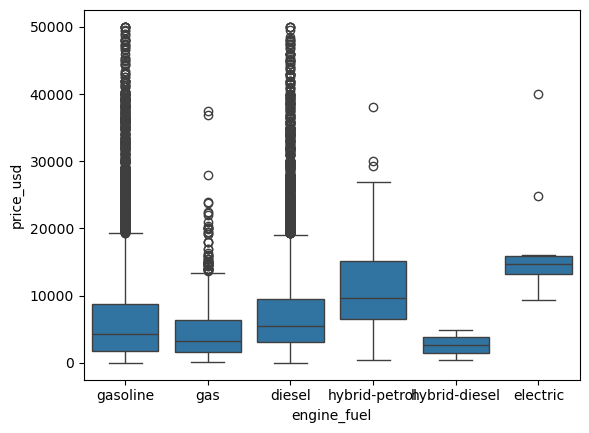

In [20]:
# Tipo de maquina vs Precio
sns.boxplot(x='engine_fuel',y='price_usd',data=df_cars)

Esto me da una mejor visualización de las categorías con respecto del precio.

Aquí podemos ver que los autos eléctricos, son los mas costosos de todas las categorías.

Estas medidas de dispersión son un complemento para las medidas anteriores de tendencia central y que en ese sentido la estadística descriptiva tiene 2 componentes fundamentales:
- Podemos resumir datos mostrando números concretos mostrando **cuartiles, valor máximo, valor mínimo, mediana, promedio**
- O también podemos hacerlo con visualizaciones, la estadística descriptiva tiene un componente de visualización importante.

Sin embargo hay muchas otras categorías de visualización que podemos usar como elementos descriptivos de un conjunto de datos.

## Extras

Aporte de edisson fabian tovar castro

En el momento de realizar el calculo de la desviación estándar hay que tener en cuenta que al momento de llamar la función .std(), la libreria realiza la operacion con la formula de muestra N-1, si desean realizar la operacion con todos los datos usen: df['price_usd].std(ddof=0) Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html